In [448]:
import sys
sys.path.append('../cloud_classifier')

import cloud_classifier

import importlib
import xarray as xr

importlib.reload(cloud_classifier)



<module 'cloud_classifier' from '/home/squidy/tropos/notebooks/../cloud_classifier/cloud_classifier.py'>

In [449]:
cc = cloud_classifier.cloud_classifier()
path = "../classifiers"
name = "new_classifier_1"
cc.create_new_project(name = name, path = path
#cc.load_project("../classifiers/new_classifier_1")

In [450]:
label_file = "../data/input_data/labels/nwcsaf_msevi-medi-20190318_1100.nc"
input_file = "../data/input_data/msevi-medi-20190318_1100.nc"
georef = "../data/training_data/msevi-medi-georef.nc"

cc.check_nwcsaf_version(filename = label_file, verbose = True)

The cloud type data is coded after the old (2013) standard


'v2013'

/home/squidy/.local/share/virtualenvs/tropos-Ssyp9URO/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


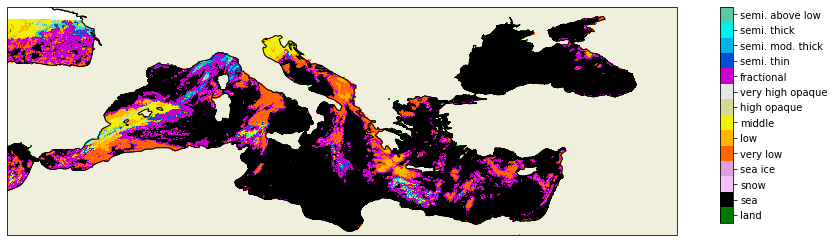

In [451]:
cc.plot_labels(data_file = label_file, georef_file = georef, reduce_to_mask = True )

In [452]:
#cc.run_training_pipeline()
cc.load_classifier(reload = True)


Classifier loaded!


In [121]:
cc.apply_mask()
vectors, indices = cc.create_input_vectors(input_file, verbose = True)
labels = cc.predict_labels(vectors, verbose = True)
xr_labels = cc.make_xrData(labels, indices)

Masked indices set!
Input vectors created!
Predicted Labels!
../classifiers/new_classifier_1/data/label_reference.nc


/home/squidy/.local/share/virtualenvs/tropos-Ssyp9URO/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


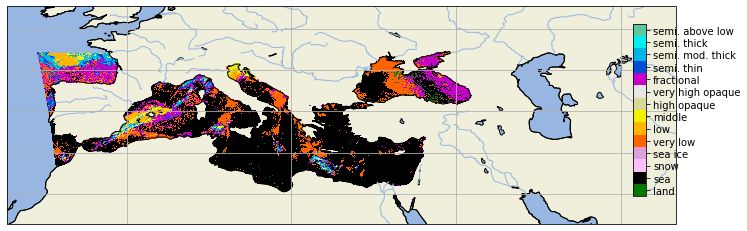

In [122]:
cc.plot_labels(data = xr_labels, georef_file = georef, reduce_to_mask = True)

/home/squidy/.local/share/virtualenvs/tropos-Ssyp9URO/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


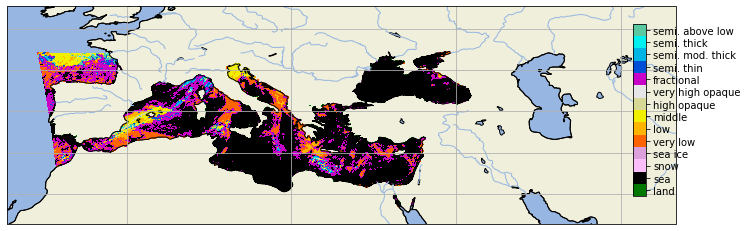